In [12]:
# Import our relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [30]:
data = pd.read_csv('C:/Users/eric/Desktop/ML/3HW/Drink_Dataset.csv')
data.head(10)

,class,drink,rank,amount1,count
0,A,Coke,7,100,200
1,B,Pepsi,6,200,100
2,C,7UP,5,200,100
3,D,Sprite,4,400,200
4,E,Latte,3,800,100
5,F,Espresso,2,800,100
6,G,Cappuccino,1,900,200


In [31]:
data=data.dropna()

In [32]:
labelencoder = LabelEncoder()
data['class'] = labelencoder.fit_transform(data['class'])

In [33]:
data.head(10)

,class,drink,rank,amount1,count
0,0,Coke,7,100,200
1,1,Pepsi,6,200,100
2,2,7UP,5,200,100
3,3,Sprite,4,400,200
4,4,Latte,3,800,100
5,5,Espresso,2,800,100
6,6,Cappuccino,1,900,200


In [34]:
data['drink'] = labelencoder.fit_transform(data['drink'])

In [35]:
data.head(10)

,class,drink,rank,amount1,count
0,0,2,7,100,200
1,1,5,6,200,100
2,2,0,5,200,100
3,3,6,4,400,200
4,4,4,3,800,100
5,5,3,2,800,100
6,6,1,1,900,200


In [36]:
# Drop the id column
data = data.drop('drink', axis=1)
# Convert the diagnosis column to numeric format
data['amount1'] = data['amount1'].factorize()[0]
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = data['amount1']
data = data.drop('amount1', axis=1)

In [37]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [38]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 6 nearest neighbors...
[t-SNE] Indexed 7 samples in 0.000s...
[t-SNE] Computed neighbors for 7 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.707672
[t-SNE] KL divergence after 2000 iterations: 0.158585


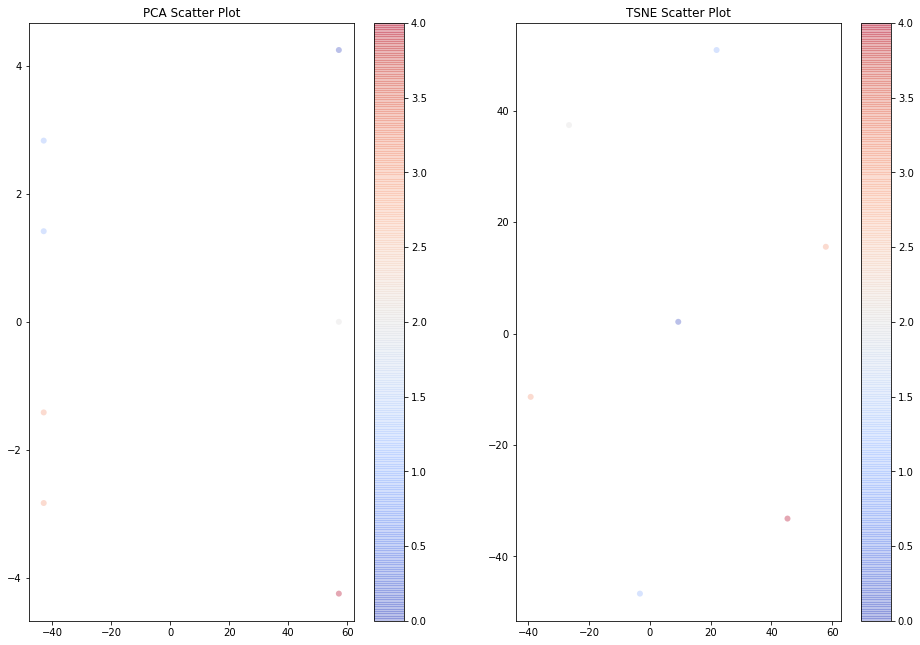

In [39]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()